# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [63]:
#!pip install requests
#!pip install gmaps
#!pip install citipy

In [147]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
#from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

np.random.seed(42)

## Generate Cities List

In [148]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

597

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [149]:
#pulling url
url = 'http://api.openweathermap.org/data/2.5/weather?'

#api key from api key file
api_key = weather_api_key

#setting units
temp_units = 'imperial'
finalurl=f'{url}appid={api_key}&units={temp_units}&q='

#List for data frame
name = []
lat = []
lon = []
max_tempature = []
record = 0
sets = 0
humidity = []
cloudiness = []
wind_speed = []
data = []
country = []

#print
print('Beginning Data')
print('--------------------------------------------')

#set up for loop for cities
for city in cities:
    
    response = requests.get(finalurl+city).json()

    try:
        test ={
        "city_name": response['name'], 
        "Lat": response['coord']['lat'],
        "Lng": response['coord']['lon'],
        "Max_temperature": response['main']['temp_max'],
        "humidity": response['main']['humidity'],
        "cloudiness": response['clouds']['all'],
        "wind_speed": response['wind']['speed'],
        "country": response['sys']['country'],
        "date": response['dt']
                }
        data.append(test)

        print(f'Processing Record {record} of {record} | {response["name"]}')
        record = record+1
    except:
       
        pass
    
print(data)
#printing results
print(f'-----------------------')
print(f'Data Retreival Complete')

Beginning Data
--------------------------------------------
Processing Record 0 of 0 | Henties Bay
Processing Record 1 of 1 | Bethel
Processing Record 2 of 2 | Saint-François
Processing Record 3 of 3 | Ushuaia
Processing Record 4 of 4 | Mar del Plata
Processing Record 5 of 5 | Kruisfontein
Processing Record 6 of 6 | Brønnøysund
Processing Record 7 of 7 | Yumen
Processing Record 8 of 8 | Albany
Processing Record 9 of 9 | Dikson
Processing Record 10 of 10 | Ossora
Processing Record 11 of 11 | Vaini
Processing Record 12 of 12 | Castro
Processing Record 13 of 13 | Vanimo
Processing Record 14 of 14 | San Cristobal
Processing Record 15 of 15 | Ulladulla
Processing Record 16 of 16 | ‘Ewa Beach
Processing Record 17 of 17 | Bluff
Processing Record 18 of 18 | Departamento de Maldonado
Processing Record 19 of 19 | Mataura
Processing Record 20 of 20 | Jamestown
Processing Record 21 of 21 | Geraldton
Processing Record 22 of 22 | Punta Arenas
Processing Record 23 of 23 | Mitú
Processing Record 24 of

Processing Record 207 of 207 | Saldanha
Processing Record 208 of 208 | Suoyarvi
Processing Record 209 of 209 | Chapais
Processing Record 210 of 210 | Plettenberg Bay
Processing Record 211 of 211 | Tottori-shi
Processing Record 212 of 212 | Abu Samrah
Processing Record 213 of 213 | Forsytheganj
Processing Record 214 of 214 | Ashland
Processing Record 215 of 215 | Dingle
Processing Record 216 of 216 | Yining
Processing Record 217 of 217 | Belmonte
Processing Record 218 of 218 | Carnarvon
Processing Record 219 of 219 | Gravelbourg
Processing Record 220 of 220 | Warmbad
Processing Record 221 of 221 | Lukovetskiy
Processing Record 222 of 222 | Torbay
Processing Record 223 of 223 | Khovd
Processing Record 224 of 224 | Meulaboh
Processing Record 225 of 225 | Pouébo
Processing Record 226 of 226 | Upernavik
Processing Record 227 of 227 | Los Andes
Processing Record 228 of 228 | Leningradskiy
Processing Record 229 of 229 | Sinnamary
Processing Record 230 of 230 | Lagoa
Processing Record 231 of 2

Processing Record 410 of 410 | Peniche
Processing Record 411 of 411 | Matagami
Processing Record 412 of 412 | South Valley
Processing Record 413 of 413 | Mehamn
Processing Record 414 of 414 | São José da Coroa Grande
Processing Record 415 of 415 | Sabang
Processing Record 416 of 416 | Rovaniemi
Processing Record 417 of 417 | Fukuechō
Processing Record 418 of 418 | Naghadeh
Processing Record 419 of 419 | Ayabaca
Processing Record 420 of 420 | Catuday
Processing Record 421 of 421 | Yinzhu
Processing Record 422 of 422 | Bandarbeyla
Processing Record 423 of 423 | Toora-Khem
Processing Record 424 of 424 | College
Processing Record 425 of 425 | Klyuchi
Processing Record 426 of 426 | Noumea
Processing Record 427 of 427 | Furtwangen im Schwarzwald
Processing Record 428 of 428 | Punta de Bombón
Processing Record 429 of 429 | Tessalit
Processing Record 430 of 430 | Aykhal
Processing Record 431 of 431 | Conde
Processing Record 432 of 432 | Cohoes
Processing Record 433 of 433 | Sambava
Processing 

In [150]:
#pulling url
url = 'http://api.openweathermap.org/data/2.5/weather?'

#api key from api key file
api_key = weather_api_key

#setting units
temp_units = 'imperial'
finalurl=f'{url}appid={api_key}&units={temp_units}&q='
response = requests.get(finalurl+'Boston').json()

#print 
print (response)

{'coord': {'lon': -71.0598, 'lat': 42.3584}, 'weather': [{'id': 601, 'main': 'Snow', 'description': 'snow', 'icon': '13n'}, {'id': 701, 'main': 'Mist', 'description': 'mist', 'icon': '50n'}], 'base': 'stations', 'main': {'temp': 26.46, 'feels_like': 18.25, 'temp_min': 24.8, 'temp_max': 28, 'pressure': 1022, 'humidity': 100}, 'visibility': 3219, 'wind': {'speed': 6.91, 'deg': 10}, 'snow': {'1h': 1.54}, 'clouds': {'all': 90}, 'dt': 1612913405, 'sys': {'type': 1, 'id': 3486, 'country': 'US', 'sunrise': 1612871309, 'sunset': 1612908514}, 'timezone': -18000, 'id': 4930956, 'name': 'Boston', 'cod': 200}


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [151]:
#setting up data frame
city_df = pd.DataFrame(data)

city_df.head()

,city_name,Lat,Lng,Max_temperature,humidity,cloudiness,wind_speed,country,date
0,Henties Bay,-22.1160,14.2845,68.0,89,52,11.43,NA,1612912500
1,Bethel,41.3712,-73.4140,27.0,91,100,3.47,US,1612912501
2,Saint-François,46.4154,3.9054,37.4,93,75,4.61,FR,1612912501
3,Ushuaia,-54.8000,-68.3000,69.8,68,40,2.30,AR,1612912501
4,Mar del Plata,-38.0023,-57.5575,66.2,82,75,13.80,AR,1612912502


In [152]:
#pulling CSV file
city_df.to_csv("cities.csv", index=False)


In [153]:
#Describe will show dataframe
city_df.describe()

,Lat,Lng,Max_temperature,humidity,cloudiness,wind_speed,date
count,544.000000,544.000000,544.000000,544.000000,544.000000,544.000000,5.440000e+02
mean,20.099162,17.257151,49.278401,73.729779,53.928309,7.940735,1.612913e+09
std,33.145578,88.692192,31.735119,19.959687,37.751348,5.898688,7.509454e+01
min,-54.800000,-179.166700,-38.200000,8.000000,0.000000,0.180000,1.612912e+09
25%,-6.908575,-60.897200,28.965000,65.000000,20.000000,3.440000,1.612913e+09
50%,22.622500,17.954800,62.355000,79.500000,61.500000,6.725000,1.612913e+09
75%,48.690550,99.472150,75.200000,88.000000,90.000000,10.745000,1.612913e+09
max,78.218600,179.316700,86.000000,100.000000,100.000000,42.840000,1.612913e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [154]:
humidity = city_df[city_df['humidity']>100]
humidity.head()

,city_name,Lat,Lng,Max_temperature,humidity,cloudiness,wind_speed,country,date


In [155]:
#get the indices of cities that have humidity over 100%.
over_100 = city_df.index[city_df['humidity'] > 100].tolist()

#print
print(over_100)

[]


In [156]:
city_df.dtypes

city_name           object
Lat                float64
Lng                float64
Max_temperature    float64
humidity             int64
cloudiness           int64
wind_speed         float64
country             object
date                 int64
dtype: object

In [157]:
#  Get the indices of cities that have humidity over 100%.
rows = city_df.index[over_100]

#reset index
city_df.reset_index

#drop unwanted rows
clean_city_data = city_df.drop(rows, inplace=True)

#print
clean_city_data

In [158]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = city_df

#print
len(clean_city_data)

544

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

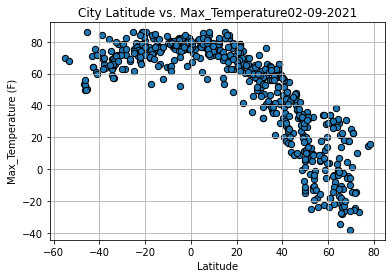

In [159]:
#set plot
#dataseries = clean_city_data.dtypes
ts = pd.Timestamp.today().strftime('%m-%d-%Y')
clean_city_data.plot(kind="scatter", x="Lat", y="Max_temperature", marker="o", s=40, facecolors="green", edgecolors="black", grid=True, title="City Latitude vs. Max_Temperature" + ts)

#setting x axis title
plt.xlabel('Latitude')

#setting y axis title
plt.ylabel('Max_Temperature (F)')


#save plot as png
plt.savefig("Latitude_vs_Max_Temp.png")

#print
plt.show()

## Latitude vs. Humidity Plot

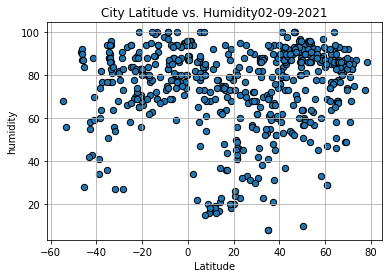

In [185]:
#setting up pot
ts = pd.Timestamp.today().strftime('%m-%d-%Y')
clean_city_data.plot(kind="scatter", x="Lat", y="humidity", marker="o", s=40, facecolors="green", edgecolors="black", grid=True, title="City Latitude vs. Humidity" + ts)

#setting x axis title
plt.xlabel('Latitude')

#setting y axis title
plt.ylabel('humidity')

#save plot as png
plt.savefig("Latitude_vs_Humidity.png")

#print
plt.show()

## Latitude vs. Cloudiness Plot

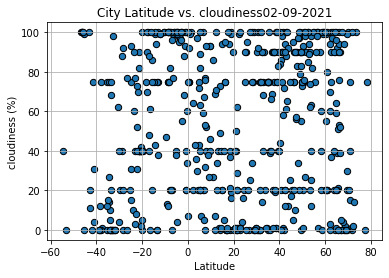

In [186]:
#creating plot
ts = pd.Timestamp.today().strftime('%m-%d-%Y')
clean_city_data.plot(kind="scatter", x="Lat", y="cloudiness", marker="o", s=40, facecolor="green", edgecolors="black", grid=True, title="City Latitude vs. cloudiness" + ts)

#setting x axis title
plt.xlabel('Latitude')

#setting y axis title
plt.ylabel('cloudiness (%)')

#save plot as png
plt.savefig("Latitude_vs_cloudiness.png")

#print
plt.show()

## Latitude vs. Wind Speed Plot

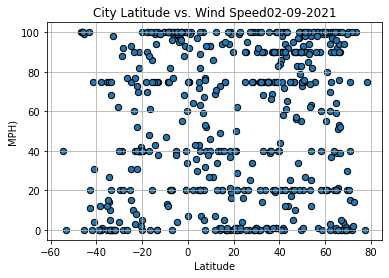

In [187]:
#creating plot
ts = pd.Timestamp.today().strftime('%m-%d-%Y')
clean_city_data.plot(kind="scatter", x="Lat", y="cloudiness", marker="o", s=40, facecolor="green", edgecolors="black", grid=True, title="City Latitude vs. Wind Speed" + ts)

#setting x axis title
plt.xlabel('Latitude')

#setting y axis title
plt.ylabel('MPH)')

#save plot as png
plt.savefig("Latitude_vs_Wind_Speed.png")

#print
plt.show()

## Linear Regression

In [163]:
#setting data frame for each hemisphere
north = clean_city_data.loc[clean_city_data['Lat']>0]
south = clean_city_data.loc[clean_city_data['Lat']<0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7723523925258459


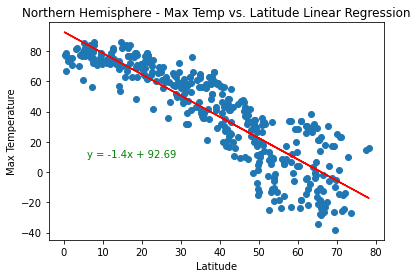

In [181]:
#Add the linear regression equation and line to plot and axis values
x_values = north['Lat']
y_values = north['Max_temperature']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_value = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#creating plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_value,"r-")

#adding line equation to plot
plt.annotate(line_eq,(6,10),fontsize=10,color='green')

#setting x axis title
plt.xlabel('Latitude')

#setting y axis title
plt.ylabel('Max Temperature')

#set title
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')

#displays r value
print(f'The r-squared is: {rvalue**2}')

#save plot as png
plt.savefig("Northern Hemisphere - Max_Temperature vs Latitude Linear Regression.png")

#print
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7723523925258459


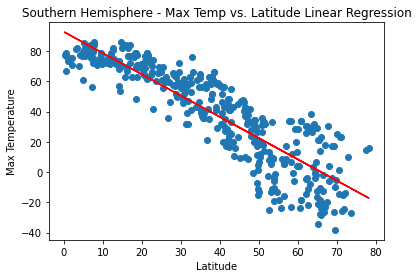

In [180]:
#Add the linear regression equation and line to plot and axis values
x_values = north['Lat']
y_values = north['Max_temperature']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_value = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#creating plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_value,"r-")

#adding line equation to plot
plt.annotate(line_eq,(-10,60),fontsize=10,color="green")

#setting x axis title
plt.xlabel('Latitude')

#setting y axis title
plt.ylabel('Max Temperature')

#set title
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')

#displays r value
print(f'The r-squared is: {rvalue**2}')

#save plot as png
plt.savefig("Southern Hemisphere - Max Temp vs Latitude Linear Regression.png")

#print
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.07200056749936523


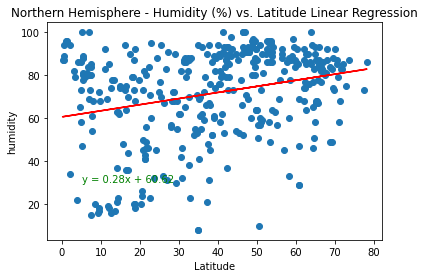

In [179]:
x_values = north['Lat']
y_values = north['humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_value = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#Add the linear regression equation and line to plot and axis values
#creating plot
#adding line equation to plot
#setting y axis title
#setting y axis title
#displays r value
#save plot as png
#print


plt.scatter(x_values,y_values)
plt.plot(x_values,regress_value,"r-")

plt.annotate(line_eq,(5,30),fontsize=10,color="green")
plt.xlabel('Latitude')
plt.ylabel('humidity')

#set title
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression')

print(f'The r-squared is: {rvalue**2}')
plt.savefig("Northern Hemisphere - Humidity (%) vs Latitude Linear Regression.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r_squared is: 0.014657284859450339


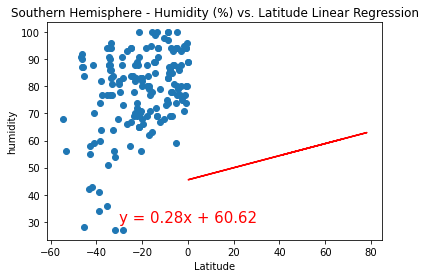

In [178]:
#Add the linear regession equation and line to plot and axis values
x_value = south['Lat']
y_value = south['humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_ep = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

#creating plot
plt.scatter(x_value, y_value)
plt.plot(x_values, regress_values,'r-')

#adding line equation to plot
plt.annotate(line_eq,(-30,30), fontsize=15, color='red')

#setting x axis title
plt.xlabel('Latitude')

#setting y axis title
plt.ylabel('humidity')

#set title
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression')

#displays r value
print(f'The r_squared is: {rvalue**2}')

#save plot as png
plt.savefig('Southern Hemisphere - Humidity (%) vs. Latitude linear Regression.png')

#print
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r_squared is: 0.014657284859450339


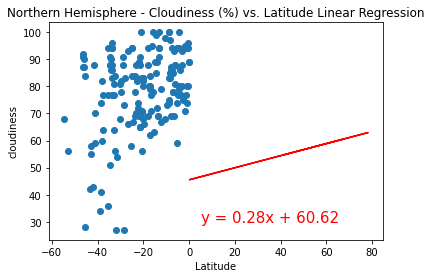

In [177]:
#Add the linear regession equation and line to plot and axis values
x_values = north['Lat']
y_values = north['cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_ep = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

#creating plot
plt.scatter(x_value, y_value)
plt.plot(x_values, regress_values,'r-')

#adding line equation to plot
plt.annotate(line_eq,(5,30), fontsize=15, color='red')

#setting x axis title
plt.xlabel('Latitude')

#set title
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')

#setting y axis title
plt.ylabel('cloudiness')

#set title
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')

#displays r value
print(f'The r_squared is: {rvalue**2}')

#save plot as png
plt.savefig('Nouthern Hemisphere - Cloudiness (%) vs. Latitude linear Regression.png')

#print
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r_squared is: 0.14822606528353877


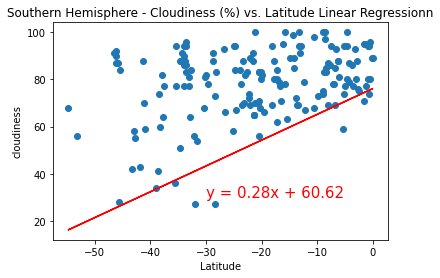

In [176]:
#Add the linear regession equation and line to plot and axis values
x_values = south['Lat']
y_values = south['cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_ep = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

#creating plot
plt.scatter(x_value, y_value)
plt.plot(x_values, regress_values,'r-')

#adding line equation to plot
plt.annotate(line_eq,(-30,30), fontsize=15, color='red')

#setting x axis title
plt.xlabel('Latitude')

#setting y axis title
plt.ylabel('cloudiness')

#set title
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regressionn')

#displays r value
print(f'The r_squared is: {rvalue**2}')

#save plot as png
plt.savefig('Southern Hemisphere - Cloudiness (%) vs. Latitude linear Regression.png')

#print
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r_squared is: 0.013026019110801156


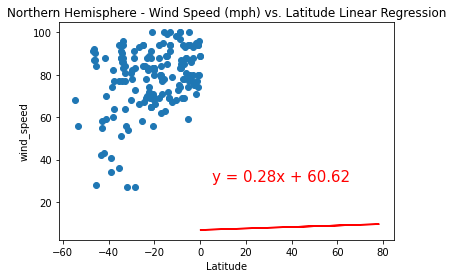

In [175]:
#Add the linear regession equation and line to plot and axis values
x_values = north['Lat']
y_values = north['wind_speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_ep = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

#creating plot
plt.scatter(x_value, y_value)
plt.plot(x_values, regress_values,'r-')

#adding line equation to plot
plt.annotate(line_eq,(5,30), fontsize=15, color='red')

#setting x axis title
plt.xlabel('Latitude')

#setting y axis title
plt.ylabel('wind_speed')

#set title
plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')

#displays r value
print(f'The r_squared is: {rvalue**2}')

#save plot as png
plt.savefig('Nouthern Hemisphere - Wind Speed (mph) vs. Latitude linear Regression.png')

#print
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r_squared is: 0.023937770462275087


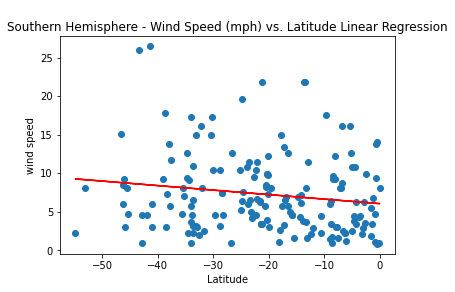

In [174]:
#Add the linear regession equation and line to plot and axis values
x_values = south['Lat']
y_values = south['wind_speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_ep = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

#creating plot
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, 'r-')

#adding line equation to plot
plt.annotate(line_ep, (-30,30), fontsize=15, color='red')

#setting x axis title
plt.xlabel('Latitude')

#setting y axis title
plt.ylabel('wind speed')

#set title
plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')

#displays r value
print(f'The r_squared is: {rvalue**2}')

#save plot as png
plt.savefig('Southern Hemisphere - Wind Speed (mph) vs. Latitude linear Regression.png')

#print
plt.show()